<a href="https://colab.research.google.com/github/solharsh/Dogs-and-Cats-Prediction/blob/master/Dogs_and_Cats_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
!git clone https://github.com/dipak104/Dogs-and-Cats-Prediction.git

Cloning into 'Dogs-and-Cats-Prediction'...
remote: Enumerating objects: 25016, done.
remote: Total 25016 (delta 0), reused 0 (delta 0), pack-reused 25016
Receiving objects: 100% (25016/25016), 541.56 MiB | 38.13 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (25002/25002), done.


In [0]:
test_data_dir = '/content/Dogs-and-Cats-Prediction/data/test'
train_data_dir = '/content/Dogs-and-Cats-Prediction/data/train'

In [0]:
img_width = 32
img_height = 32
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=1./255)

In [52]:
train_generator = datagen.flow_from_directory(directory = train_data_dir, target_size=(img_width, img_height),
                                              classes=['dogs','cats'], class_mode='binary', batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [53]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [54]:
validation_generator = datagen.flow_from_directory(directory = test_data_dir, target_size=(32, 32),
                                                   classes=['dogs','cats'], class_mode = 'binary',batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [55]:
len(train_generator)

1000

# Build Base CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', 
                 input_shape=(img_width, img_height,3)))
model.add(MaxPool2D(2, 2))

model.add(Flatten())
model.add(Dense(units = 128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator),
                              epochs=5, validation_data=validation_generator, 
                              validation_steps=len(validation_generator), verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1000/1000 [==============================] - 98s 98ms/step - loss: 0.6962 - accuracy: 0.4994 - val_loss: 0.6924 - val_accuracy: 0.5080
Epoch 2/5
1000/1000 [==============================] - 98s 98ms/step - loss: 0.6893 - accuracy: 0.5092 - val_loss: 0.6907 - val_accuracy: 0.5102
Epoch 3/5
1000/1000 [==============================] - 97s 97ms/step - loss: 0.6827 - accuracy: 0.5379 - val_loss: 0.6748 - val_accuracy: 0.5998
Epoch 4/5
1000/1000 [==============================] - 97s 97ms/step - loss: 0.6429 - accuracy: 0.6350 - val_loss: 0.6465 - val_accuracy: 0.6096
Epoch 5/5
1000/1000 [==============================] - 97s 97ms/step - loss: 0.5692 - accuracy: 0.7067 - val_loss: 0.5450 - val_accuracy: 0.7236


In [59]:
history.history

{'accuracy': [0.4994499981403351,
  0.5091500282287598,
  0.537850022315979,
  0.6350499987602234,
  0.7067499756813049],
 'loss': [0.6962241530418396,
  0.689299464225769,
  0.6827142834663391,
  0.642859697341919,
  0.5691814422607422],
 'val_accuracy': [0.5080000162124634,
  0.510200023651123,
  0.5997999906539917,
  0.6096000075340271,
  0.7235999703407288],
 'val_loss': [0.692383885383606,
  0.6906628012657166,
  0.6747581362724304,
  0.64654141664505,
  0.5449634194374084]}

In [0]:
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(1, 6)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

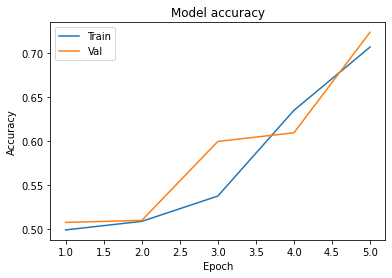

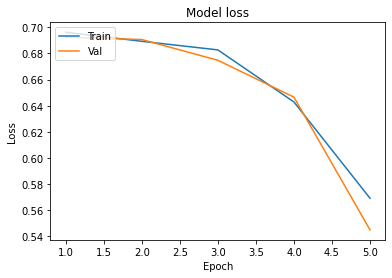

In [61]:
plot_learningCurve(history)

# Impliment First 3 Blocks of VGG16 Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', 
                 input_shape=(img_width, img_height,3)))
model.add(MaxPool2D(2, 2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2, 2))

model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2, 2))

model = Sequential()
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2, 2))

model.add(Flatten())
model.add(Dense(units = 128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator),
                              epochs=5, validation_data=validation_generator, 
                              validation_steps=len(validation_generator), verbose=1)

Epoch 1/5
1000/1000 [==============================] - 291s 291ms/step - loss: 0.7306 - accuracy: 0.4981 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 286s 286ms/step - loss: 0.6936 - accuracy: 0.4922 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 289s 289ms/step - loss: 0.6936 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 286s 286ms/step - loss: 0.6934 - accuracy: 0.5030 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 292s 292ms/step - loss: 0.6937 - accuracy: 0.5009 - val_loss: 0.6935 - val_accuracy: 0.5000


# Batch Normalization and Drouput

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', 
                 input_shape=(img_width, img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator),
                              epochs=10, validation_data=validation_generator, 
                              validation_steps=len(validation_generator), verbose=1)

Epoch 1/10
1000/1000 [==============================] - 247s 247ms/step - loss: 0.6694 - accuracy: 0.6370 - val_loss: 0.6227 - val_accuracy: 0.6732
Epoch 2/10
1000/1000 [==============================] - 245s 245ms/step - loss: 0.5875 - accuracy: 0.6977 - val_loss: 0.5654 - val_accuracy: 0.7256
Epoch 3/10
1000/1000 [==============================] - 243s 243ms/step - loss: 0.5514 - accuracy: 0.7237 - val_loss: 0.5676 - val_accuracy: 0.7002
Epoch 4/10
1000/1000 [==============================] - 241s 241ms/step - loss: 0.5305 - accuracy: 0.7366 - val_loss: 0.5301 - val_accuracy: 0.7348
Epoch 5/10
1000/1000 [==============================] - 245s 245ms/step - loss: 0.5115 - accuracy: 0.7484 - val_loss: 0.5339 - val_accuracy: 0.7382
Epoch 6/10
1000/1000 [==============================] - 243s 243ms/step - loss: 0.4964 - accuracy: 0.7600 - val_loss: 0.5462 - val_accuracy: 0.7360
Epoch 7/10
1000/1000 [==============================] - 245s 245ms/step - loss: 0.4912 - accuracy: 0.7653 - val_

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

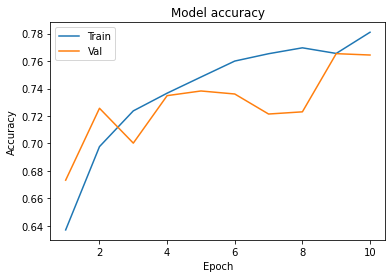

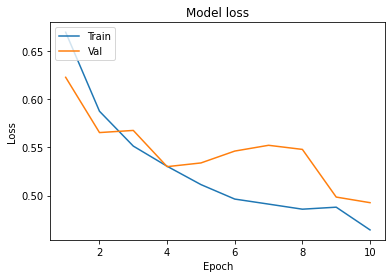

In [69]:
plot_learningCurve(history, 10)